# M5 Food Category

This notebook extracts the time-series on the food category of the [M5 Forecasting - Accuracy](https://www.kaggle.com/c/m5-forecasting-accuracy/data) dataset.

Raw data set can be retrieved as follows:

1. Add to the root folder ('../data/') the zipped m5 file

```
kaggle competitions download -c m5-forecasting-accuracy -p ../data
```

2. Unzip the files

```
unzip ../m5-forecasting-accuracy.zip
```

## Loading the Raw Data

In [5]:
import os

import pandas as pd

In [3]:
root = os.path.abspath('../data/')
calendar_pth = os.path.join(root, 'calendar.csv')
sales_train_eval_pth = os.path.join(root, 'sales_train_evaluation.csv')
sales_train_val_pth = os.path.join(root, 'sales_train_validation.csv')
sample_submission_pth = os.path.join(root, 'sample_submission.csv')
sell_prices_pth = os.path.join(root, 'sell_prices.csv')

In [9]:
calendar = pd.read_csv(calendar_pth, parse_dates=['date'])
sales_train_eval = pd.read_csv(sales_train_eval_pth)
sales_train_val = pd.read_csv(sales_train_val_pth)
sample_submission = pd.read_csv(sample_submission_pth)
sell_prices = pd.read_csv(sell_prices_pth)

In [10]:
sell_prices

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
...,...,...,...,...
6841116,WI_3,FOODS_3_827,11617,1.00
6841117,WI_3,FOODS_3_827,11618,1.00
6841118,WI_3,FOODS_3_827,11619,1.00
6841119,WI_3,FOODS_3_827,11620,1.00


In [11]:
calendar

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0


In [15]:
foods = sales_train_eval.loc[sales_train_eval.cat_id == 'FOODS']

In [17]:
foods

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
1612,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,3,0,0,1,...,2,3,1,0,0,0,1,0,0,0
1613,FOODS_1_002_CA_1_evaluation,FOODS_1_002,FOODS_1,FOODS,CA_1,CA,0,1,0,1,...,2,1,0,1,1,1,0,1,1,2
1614,FOODS_1_003_CA_1_evaluation,FOODS_1_003,FOODS_1,FOODS,CA_1,CA,0,0,0,0,...,2,0,0,0,0,0,2,2,0,1
1615,FOODS_1_004_CA_1_evaluation,FOODS_1_004,FOODS_1,FOODS,CA_1,CA,0,0,0,0,...,5,6,2,5,1,2,1,1,3,4
1616,FOODS_1_005_CA_1_evaluation,FOODS_1_005,FOODS_1,FOODS,CA_1,CA,3,9,3,3,...,2,1,11,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,1,0,3,0,1,1,0,0,1,1
30486,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
30487,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,0,0,1,2,0,1,0,1,0,2
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,1,1,4,6,0,1,1,1,0


## Getting the Overall Food Revenue

In [18]:
food_prices = sell_prices.loc[sell_prices.item_id.str.contains('FOODS')]

In [21]:
food_prices

,store_id,item_id,wm_yr_wk,sell_price
368746,CA_1,FOODS_1_001,11101,2.0
368747,CA_1,FOODS_1_001,11102,2.0
368748,CA_1,FOODS_1_001,11103,2.0
368749,CA_1,FOODS_1_001,11104,2.0
368750,CA_1,FOODS_1_001,11105,2.0
...,...,...,...,...
6841116,WI_3,FOODS_3_827,11617,1.0
6841117,WI_3,FOODS_3_827,11618,1.0
6841118,WI_3,FOODS_3_827,11619,1.0
6841119,WI_3,FOODS_3_827,11620,1.0


In [24]:
food_prices

,store_id,item_id,wm_yr_wk,sell_price
368746,CA_1,FOODS_1_001,11101,2.0
368747,CA_1,FOODS_1_001,11102,2.0
368748,CA_1,FOODS_1_001,11103,2.0
368749,CA_1,FOODS_1_001,11104,2.0
368750,CA_1,FOODS_1_001,11105,2.0
...,...,...,...,...
6841116,WI_3,FOODS_3_827,11617,1.0
6841117,WI_3,FOODS_3_827,11618,1.0
6841118,WI_3,FOODS_3_827,11619,1.0
6841119,WI_3,FOODS_3_827,11620,1.0


In [28]:
food_prices = food_prices.merge(
    calendar.loc[:, ['wm_yr_wk', 'd']], on='wm_yr_wk',
    how='left')

In [29]:
food_prices

,store_id,item_id,wm_yr_wk,sell_price,d
0,CA_1,FOODS_1_001,11101,2.0,d_1
1,CA_1,FOODS_1_001,11101,2.0,d_2
2,CA_1,FOODS_1_001,11101,2.0,d_3
3,CA_1,FOODS_1_001,11101,2.0,d_4
4,CA_1,FOODS_1_001,11101,2.0,d_5
...,...,...,...,...,...
22200668,WI_3,FOODS_3_827,11620,1.0,d_1965
22200669,WI_3,FOODS_3_827,11620,1.0,d_1966
22200670,WI_3,FOODS_3_827,11620,1.0,d_1967
22200671,WI_3,FOODS_3_827,11621,1.0,d_1968


In [34]:
foods = foods.loc[
    :, (foods.columns == 'item_id') | (foods.columns.str.contains('d_'))]

In [37]:
foods = pd.melt(foods, id_vars='item_id')

In [38]:
foods

,item_id,variable,value
0,FOODS_1_001,d_1,3
1,FOODS_1_002,d_1,0
2,FOODS_1_003,d_1,0
3,FOODS_1_004,d_1,0
4,FOODS_1_005,d_1,3
...,...,...,...
27892165,FOODS_3_823,d_1941,1
27892166,FOODS_3_824,d_1941,0
27892167,FOODS_3_825,d_1941,2
27892168,FOODS_3_826,d_1941,0


In [43]:
foods.columns = ['item_id', 'd', 'counts']

In [44]:
foods

,item_id,d,counts
0,FOODS_1_001,d_1,3
1,FOODS_1_002,d_1,0
2,FOODS_1_003,d_1,0
3,FOODS_1_004,d_1,0
4,FOODS_1_005,d_1,3
...,...,...,...
27892165,FOODS_3_823,d_1941,1
27892166,FOODS_3_824,d_1941,0
27892167,FOODS_3_825,d_1941,2
27892168,FOODS_3_826,d_1941,0


In [41]:
food_prices = food_prices.loc[:, ['item_id', 'd', 'sell_price']]

In [42]:
food_prices

,item_id,d,sell_price
0,FOODS_1_001,d_1,2.0
1,FOODS_1_001,d_2,2.0
2,FOODS_1_001,d_3,2.0
3,FOODS_1_001,d_4,2.0
4,FOODS_1_001,d_5,2.0
...,...,...,...
22200668,FOODS_3_827,d_1965,1.0
22200669,FOODS_3_827,d_1966,1.0
22200670,FOODS_3_827,d_1967,1.0
22200671,FOODS_3_827,d_1968,1.0


In [46]:
foods = foods.merge(food_prices, on=['item_id', 'd'], how='left')

In [52]:
foods['revenue'] = foods['counts'] * foods['sell_price']

In [55]:
food_revenue = foods.groupby('d').revenue.sum().reset_index()

In [63]:
food_revenue = (food_revenue.merge(calendar.loc[:, ['d', 'date']], on='d')
                            .set_index('date').sort_index())

In [67]:
import matplotlib.pyplot as plt

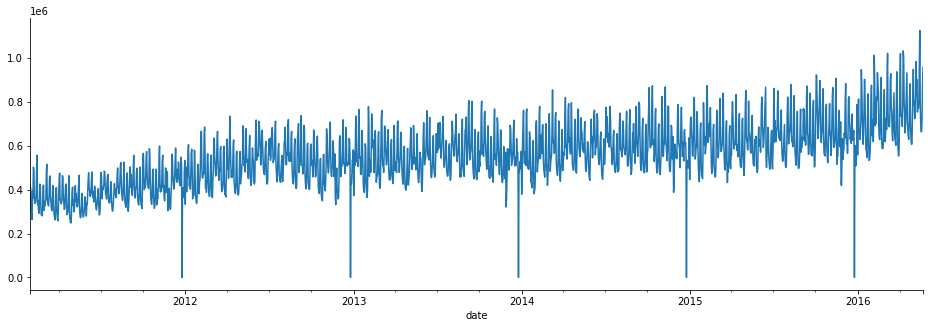

In [69]:
fig, ax = plt.subplots(figsize=(16, 5))
food_revenue.revenue.plot(ax=ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);

## Save Dataset

In [71]:
food_revenue.loc[:, 'revenue'].to_csv('../data/m5-food-revenue.csv')

In [74]:
pd.read_csv('../data/m5-food-revenue.csv')

,date,revenue
0,2011-01-29,416881.35
1,2011-01-30,405060.81
2,2011-01-31,303301.57
3,2011-02-01,332166.93
4,2011-02-02,263827.64
...,...,...
1936,2016-05-18,663407.92
1937,2016-05-19,666856.82
1938,2016-05-20,733129.18
1939,2016-05-21,885137.69
